Install Packages

In [ ]:
! pip install geopandas
! pip install pandas

Read .shp file

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Path to shape file
SHAPE_PATH = "/content/lct_000b21a_e.shp"
gdf = gpd.read_file(SHAPE_PATH)

toronto_gdf = gdf[gdf['CTUID'].str.startswith('535')]
toronto_gdf['centroid'] = toronto_gdf.geometry.centroid
central_toronto_gdf = toronto_gdf[toronto_gdf['CTUID'].between('5350001', '5350300')]
centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], geometry=central_toronto_gdf['centroid'])

# toronto_df = pd.DataFrame(toronto_gdf)



/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [25]:
central_toronto_gdf

,CTUID,DGUID,CTNAME,LANDAREA,PRUID,geometry,centroid
486,5350128.04,2021S05075350128.04,0128.04,0.1620,35,"POLYGON ((7223015.3 933307.794, 7222831.411 93...",POINT (7223168.508 933505.304)
716,5350010.01,2021S05075350010.01,0010.01,0.2476,35,"POLYGON ((7222803.377 926854.68, 7222827.986 9...",POINT (7222423.168 926944.677)
718,5350010.02,2021S05075350010.02,0010.02,0.5382,35,"POLYGON ((7222899.897 926815.014, 7222827.986 ...",POINT (7223091.668 927204.634)
904,5350001.00,2021S05075350001.00,0001.00,6.8192,35,"MULTIPOLYGON (((7228907.129 925600.146, 722890...",POINT (7228952.679 928689.504)
905,5350002.00,2021S05075350002.00,0002.00,3.3926,35,"MULTIPOLYGON (((7225485.523 924880.603, 722548...",POINT (7225601.326 925376.328)
...,...,...,...,...,...,...,...
5860,5350210.04,2021S05075350210.04,0210.04,0.4751,35,"MULTIPOLYGON (((7218043.103 923907.397, 721804...",POINT (7217906.061 924179.45)
5861,5350062.03,2021S05075350062.03,0062.03,0.4638,35,"POLYGON ((7224079.414 929324.026, 7224069.046 ...",POINT (7223993.07 929853.982)
5862,5350062.04,2021S05075350062.04,0062.04,0.1215,35,"POLYGON ((7224597.117 929588, 7224434.543 9295...",POINT (7224411.79 929807.723)
5863,5350017.01,2021S05075350017.01,0017.01,0.8026,35,"POLYGON ((7227515.551 929305.037, 7227531.82 9...",POINT (7227121.586 928916.456)


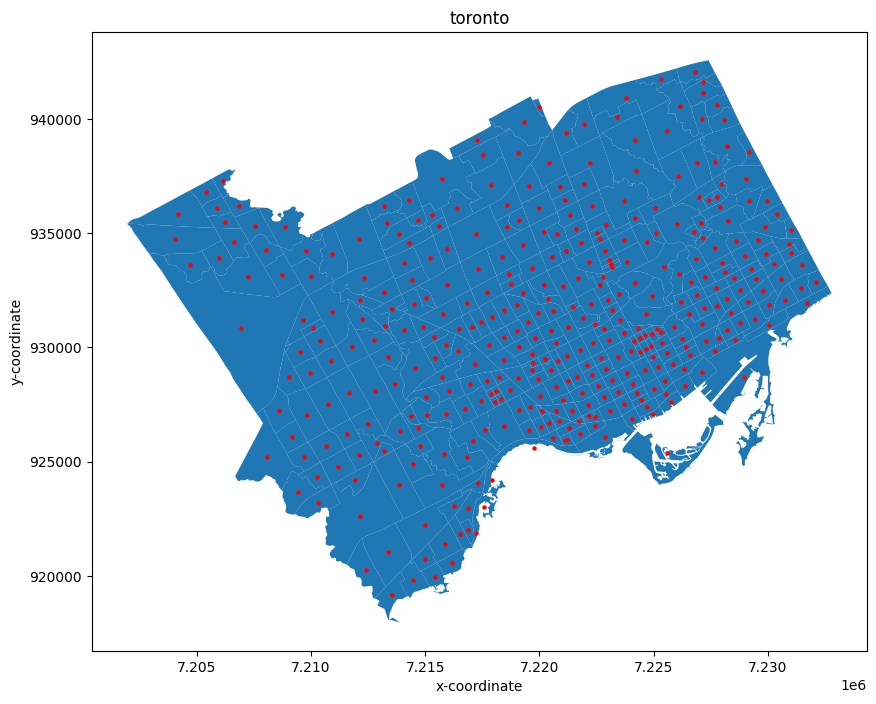

In [28]:
# gdf.plot(figsize=(10, 10), edgecolor='black', facecolor='none')
# plt.title("Census Tract Boundaries in Toronto")
# plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
central_toronto_gdf.plot(ax=ax)
centroids_gdf.plot(ax=ax, color='red', marker='o', markersize=5, label='Centroids')
# plt.xlim(-180, -60)
# plt.ylim(10, 80)
plt.title('toronto')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

In [29]:
# Save to csv
# df = pd.DataFrame(gdf)
n_centroids_gdf = gpd.GeoDataFrame(central_toronto_gdf[['CTUID']], central_toronto_gdf[['DGUID']], central_toronto_gdf[['CTNAME']],
                                 central_toronto_gdf[['LANDAREA']], central_toronto_gdf[['PRUID']], geometry=central_toronto_gdf['centroid'])

OUTPUT_PATH = "/toronto_ct_centroids.geojson"
n_centroids_gdf.to_json(OUTPUT_PATH)

TypeError: DataFrame.__init__() got multiple values for argument 'copy'